Accuracy: 0.8319256756756757

Classification Report:
               precision    recall  f1-score   support

    negative       0.82      0.84      0.83       439
     neutral       0.77      0.73      0.75       327
    positive       0.89      0.91      0.90       418

    accuracy                           0.83      1184
   macro avg       0.83      0.82      0.83      1184
weighted avg       0.83      0.83      0.83      1184



<ipython-input-3-8a4eed67a36c>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', palette='Set2')


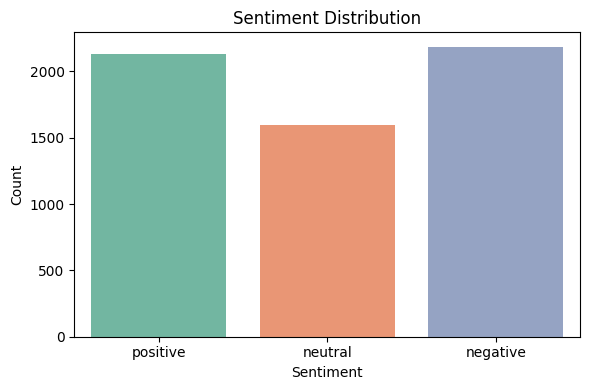

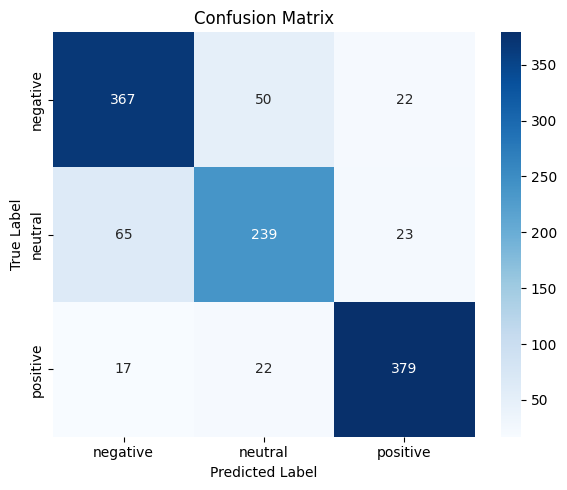

<ipython-input-3-8a4eed67a36c>:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=f1_scores, palette='Set3')


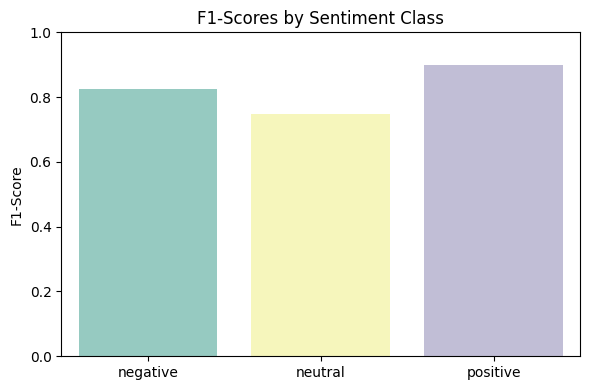

In [ ]:
!pip install seaborn scikit-learn

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = pd.read_csv('/content/sentiment text dataset.csv')

df = df.drop(columns=[col for col in df.columns if 'Unnamed' in col])
df = df[df['Sentiment'].isin(['positive', 'neutral', 'negative'])]


X = df['Text']
y = df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

model = LogisticRegression(max_iter=200)
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Sentiment', palette='Set2')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

labels = ['negative', 'neutral', 'positive']
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

f1_scores = [report[label]['f1-score'] for label in labels]
plt.figure(figsize=(6, 4))
sns.barplot(x=labels, y=f1_scores, palette='Set3')
plt.title("F1-Scores by Sentiment Class")
plt.ylabel("F1-Score")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()
